<a href="https://colab.research.google.com/github/JhonAlexG/cd_202202_Jhon_Gonzalez/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pandas as pd

In [31]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)

In [32]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [33]:
from datetime import datetime
df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")

In [34]:
df['fec_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [35]:
import pyproj
P = pyproj.Proj(proj='utm',zone=18,ellps ='WGS84',preserve_units=True)

In [36]:
df['x'], df['y']=P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not2,fec_contagio2,fec_hos2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,NaT,710198.574916,780930.648555


In [37]:
lat_alcaldia=7.06
lon_alcaldia=-73.08

x_alcaldia, y_alcaldia = P(lat_alcaldia, lon_alcaldia)
x_alcaldia, y_alcaldia

(2397132.104179374, -9729392.857310599)

In [38]:
import numpy as np

In [39]:
#Método

def calcular_distancia(x1, x2, y1, y2):
  dis = np.sqrt((x1-x2)**2+(y1-y2)**2)
  return dis

In [40]:
df['distancia'] = np.sqrt((x_alcaldia-df['x'])**2+(y_alcaldia-df['y'])**2)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fec_contagio2,fec_hos2,x,y,distancia
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,NaT,709584.027559,782579.281866,1.064657e+07
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,NaT,709262.121378,782963.354103,1.064700e+07
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,NaT,710847.924654,784163.825097,1.064793e+07
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,NaT,710863.366771,781635.895608,1.064543e+07
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,709314.159319,781570.969374,1.064561e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,NaT,709918.546763,782204.438977,1.064614e+07
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,709466.644754,781388.734012,1.064541e+07
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,NaT,709492.782783,784279.996264,1.064826e+07
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,NaT,710198.574916,780930.648555,1.064484e+07


In [41]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object','datetime64'])
datosf = datosf.drop('año', axis = 1)
datosf = datosf.drop('cod_pais_o', axis = 1)
datosf = datosf.drop('condicion_final', axis = 1)
datosf = datosf.drop('fecha_defuncion', axis = 1)
datosf = datosf.drop('certif_defuncion', axis = 1)

In [42]:
from numpy import abs
from math import e, pi

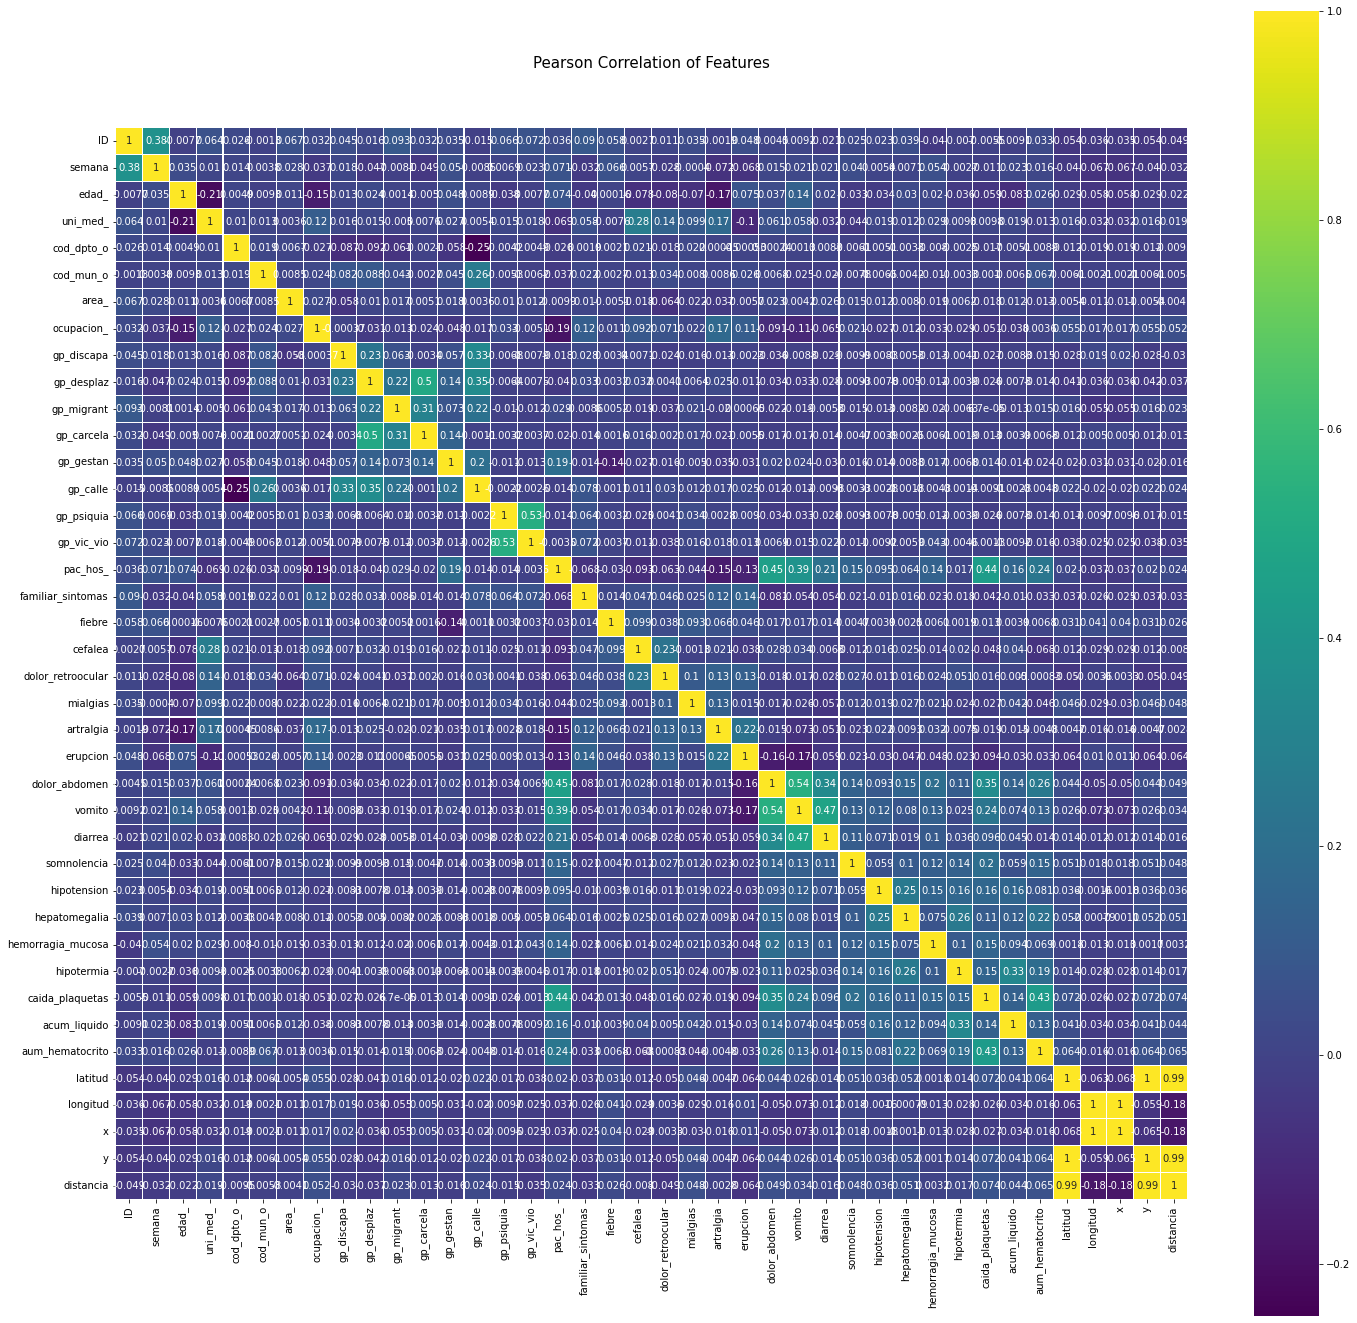

In [43]:
import matplotlib.pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap,linecolor='white', annot=True)

In [44]:
from math import ceil,floor
ab = 100
res = 10

In [45]:
def casos():
  minx = df['x'].min() - ab
  miny = df['y'].min() - ab
  maxx = df['x'].max() + ab
  maxy = df['y'].max() + ab

  len_x = ceil((maxx-minx)/res)
  len_y = ceil((maxy-miny)/res)

  print(len_x, len_y)

  matriz = [[0  for i in range(len_x)] for j in range(len_y)]
  for i in range(df.shape[0]):
    a = floor((df.loc[i, 'y'] - miny)/res)
    b = floor((df.loc[i, 'x'] - minx)/res)

    matriz[a][b] += 1

  return len_x, len_y, matriz

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [47]:
def acumulado(len_x, len_y):
  acumula = [[0  for i in range(len_x)] for j in range(len_y)]

  intr = int(ab/res)

  for i in range(len_y):
    for j in range(len_x):
      if matriz[i][j]>0:
        for k in range((i- intr), (i + intr)):
          for l in range((j-intr),(j+intr)):
            dist=np.sqrt((i-k)**2+(j-l)**2)*res
            if dist<ab:
              acumula[k][l] += matriz[i][j]

  return acumula

In [48]:
def paint (matriz):
  fig = plt.figure(figsize=(50, 40))

  ax = fig.add_subplot(111)
  ax.set_title('Mapa de calor')
  plt.imshow(matriz)
  ax.set_aspect('equal')

  cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
  cax.get_xaxis().set_visible(False)
  cax.get_yaxis().set_visible(False)
  cax.patch.set_alpha(0)
  cax.set_frame_on(False)
  plt.colorbar(orientation='vertical')
  plt.show()

Uniforme

In [49]:
def uniforme():
  y=0.5
  return y

Triangular

In [50]:
def triangular(x):
  y=1-abs(x/ab)
  return y

Gaussiana

In [51]:
def gauss(x):
  y=(e**(-(((x/ab)**2)/2)))/(np.sqrt(2*pi))
  return y

Epanechnikov


In [52]:
def epanechnikov (x):
  y=(3/4)*(1-(x/ab)**2)
  return y

Varianza mínima

In [53]:
def min_var (x):
  y=(3/8)*(3-5*(x/ab)**2)
  return y

In [54]:
def function(len_x, len_y):
  acumulado = [[0 for i in range(len_x)] for j in range(len_y)]

  intr = int(ab/res)

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if matriz[i][j]>0:
        for k in range(i-intr, i+intr):
          for l in range(j-intr, j+intr):
            dist=(math.sqrt((i-k)**2+(j-l)**2))*res
            if dist<ab:
              acumulado[k][l]+=(density(dist, op)*matriz[i][j])/(pi*ab**2)

  return acumulado

In [55]:
def density(dist, op):
  if op==1:
    return triangular(dist)
  elif op==2:
    return gauss(dist)
  elif op==3:
    return epanechnikov(dist)
  elif op==4:
    return min_var(dist)
  elif op==5:
    uniforme()
  else:
    print("Opción inválida")
    return 0
  
  return densidad

458 475


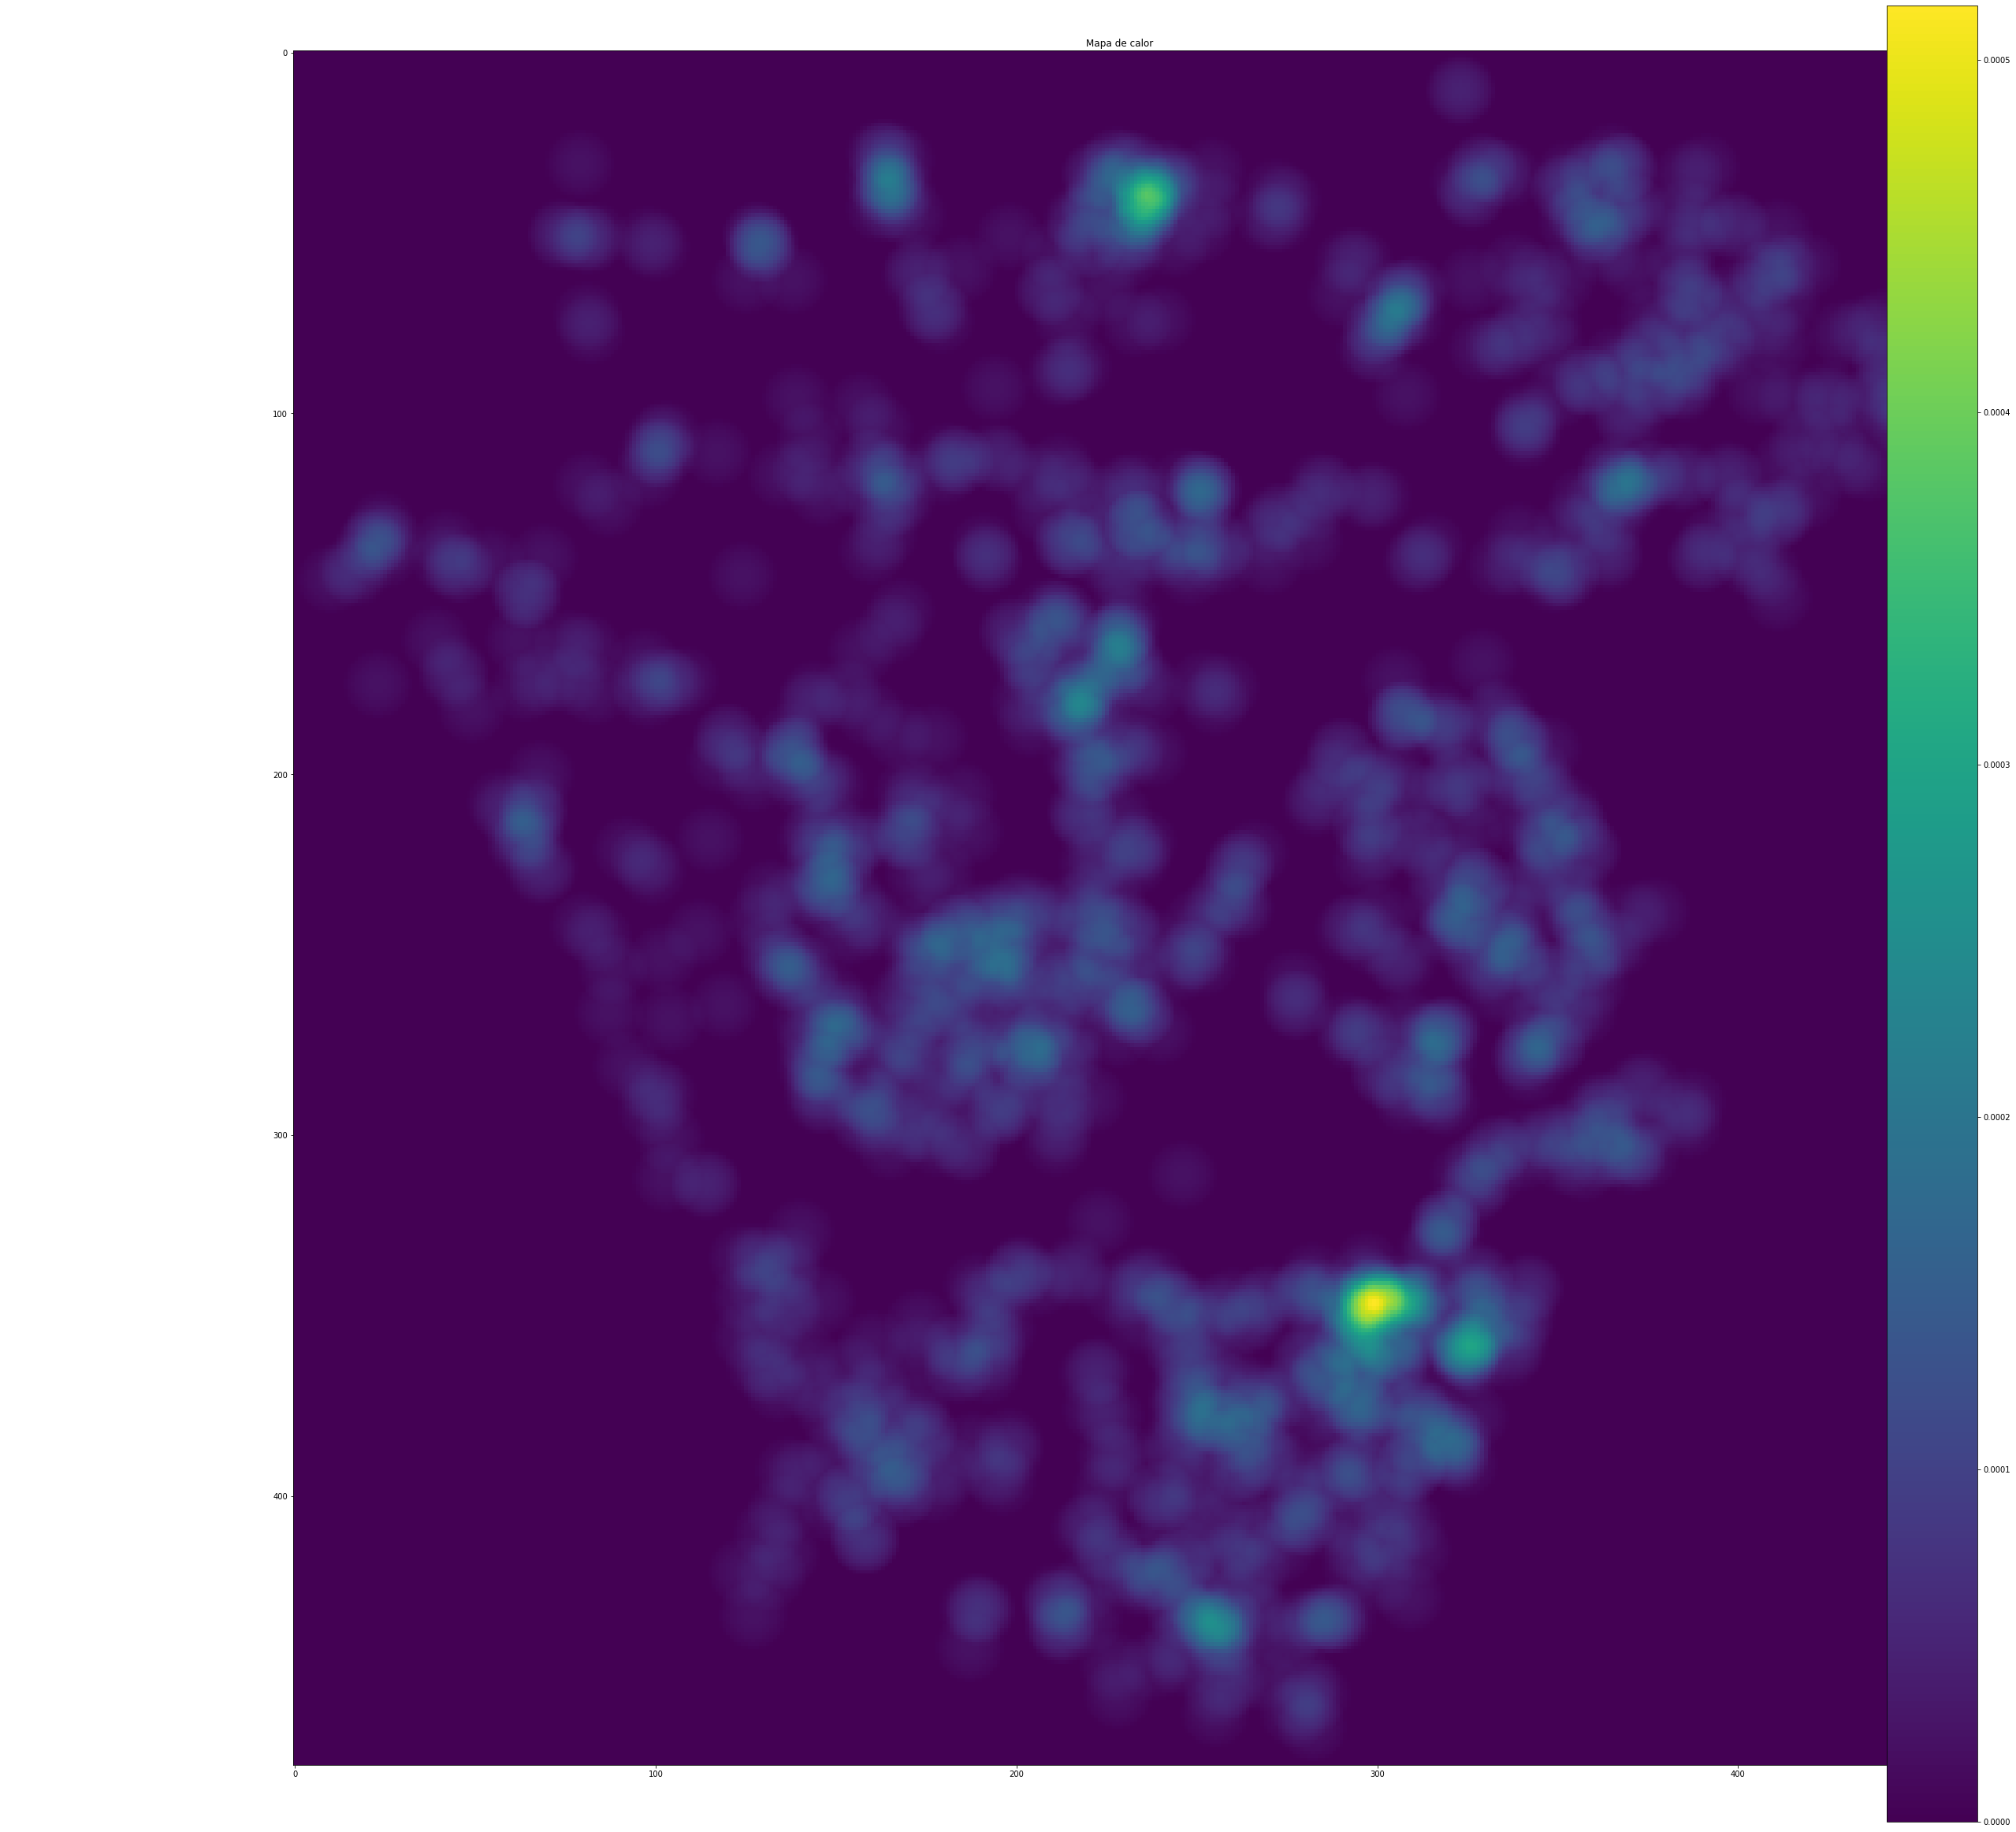

1

In [56]:
res=10
#int(input("Ingrese el valor de la resolución"))
ab=100
#int(input("Ingrese el valor del ancho de banda"))
op=3
#int(input("Escoja la función para usar\n 1. Triangular\n 2. Gaussiana\n 3.Epanechnikov\n 4. Varianza mínima \n 5. Uniforme \n"))

len_x, len_y, matriz=casos()
acm=acumulado(len_x, len_y)
densidad=function(len_x, len_y)
paint(densidad)
1

In [57]:
!pip install cython
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 27.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 18.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 19.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████

In [58]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Selecting previously unselected package python-pkg-resources.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../01-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../02-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../04-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-numpy.
Preparing to unpack .../05-python

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [61]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscalinternacional.com/cartografia/'

file_list = ["68276_manzanas.cpg", "68276_manzanas.dbf", "68276_manzanas.prj", "68276_manzanas.qpj", "68276_manzanas.shp", "68276_manzanas.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

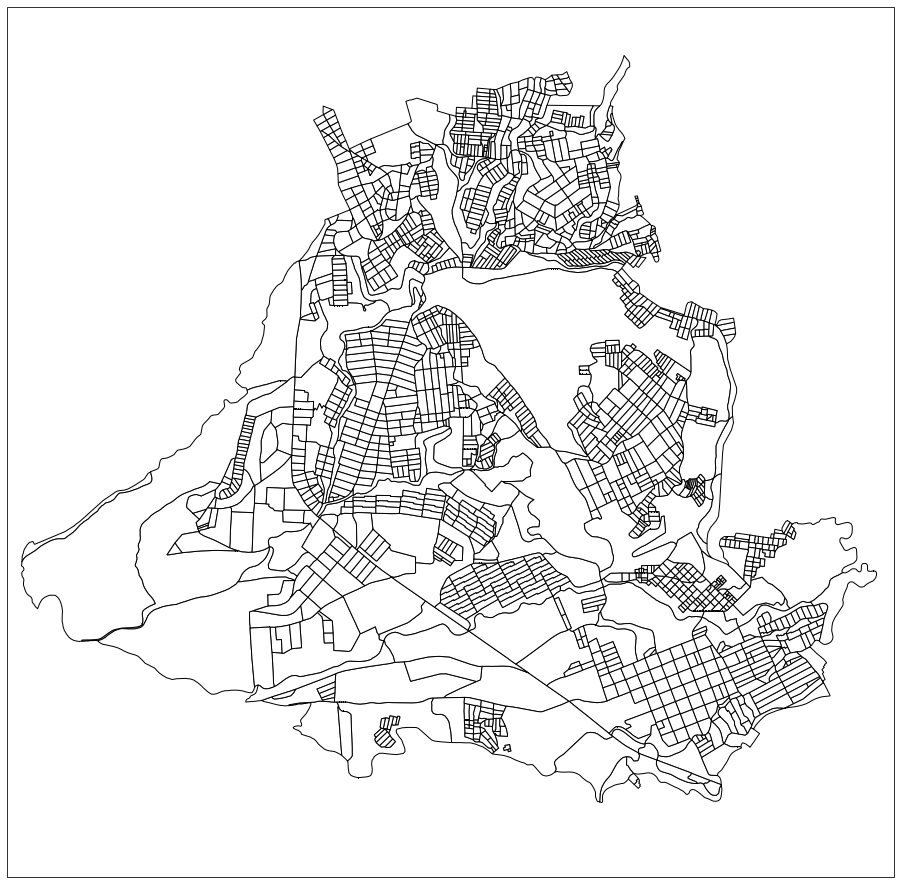

In [62]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_manzanas')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='black')

ax.add_line
plt.show()

In [63]:
import colorsys
import math

In [64]:
def generar_gama(ri,gi,bi,rf,gf,bf,cantidad):
  hsvi = colorsys.rgb_to_hsv(ri/255,gi/255,bi/255)
  hsvf = colorsys.rgb_to_hsv(rf/255,gf/255,bf/255)

  pasoh = (hsvf[0]- hsvi[0])/(cantidad - 1)
  pasos= (hsvf[1]- hsvi[1])/(cantidad - 1)
  pasov = (hsvf[2]- hsvi[2])/(cantidad - 1)

  listaRGB = []

  listaRGB.append((ri/255,gi/255,bi/255))

  for i in range(cantidad - 1):
    h = hsvi[0] + pasoh * (i + 1)
    s = hsvi[1] + pasos * (i + 1)
    v = hsvi[2] + pasov * (i + 1)

    rgb = colorsys.hsv_to_rgb(h,s,v)
    #listaRGB.append([round( rgb[0] * 255 , 0),round( rgb[1] * 255 , 0), round(rgb[2] * 255 , 0)] )
    listaRGB.append(rgb)

  
  return listaRGB

In [65]:
gama = generar_gama(255,0,0,255,255,0,10)
gama

[(1.0, 0.0, 0.0),
 (1.0, 0.11111111111111116, 0.0),
 (1.0, 0.2222222222222222, 0.0),
 (1.0, 0.33333333333333326, 0.0),
 (1.0, 0.4444444444444444, 0.0),
 (1.0, 0.5555555555555556, 0.0),
 (1.0, 0.6666666666666666, 0.0),
 (1.0, 0.7777777777777777, 0.0),
 (1.0, 0.8888888888888888, 0.0),
 (1.0, 1.0, 0.0)]

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as color

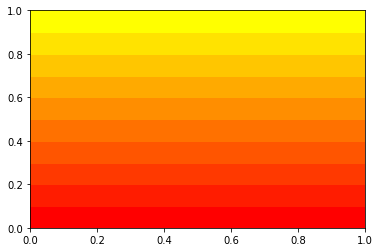

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

count = len(gama)

x=0
y=0
h=1/count


for cl in gama:
  pos = (x / count, y/count)
  ax.add_patch(patches.Rectangle(pos,1,h,color=cl))
  if y >= count-1:
    x+=1
    y=0
  else:
    y +=1


plt.show()

In [69]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fec_contagio2,fec_hos2,x,y,distancia
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,NaT,709584.027559,782579.281866,1.064657e+07
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,NaT,709262.121378,782963.354103,1.064700e+07
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,NaT,710847.924654,784163.825097,1.064793e+07
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,NaT,710863.366771,781635.895608,1.064543e+07
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-10,709314.159319,781570.969374,1.064561e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,NaT,709918.546763,782204.438977,1.064614e+07
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-13,709466.644754,781388.734012,1.064541e+07
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,NaT,709492.782783,784279.996264,1.064826e+07
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,NaT,710198.574916,780930.648555,1.064484e+07


In [120]:
df1=df
df1.dtypes

ID                            int64
fec_not                      object
semana                        int64
año                           int64
edad_                         int64
uni_med_                      int64
sexo_                        object
cod_pais_o                    int64
cod_dpto_o                    int64
cod_mun_o                     int64
area_                         int64
ocupacion_                    int64
tip_ss_                      object
cod_ase_                     object
gp_discapa                    int64
gp_desplaz                    int64
gp_migrant                    int64
gp_carcela                    int64
gp_gestan                     int64
gp_calle                      int64
gp_psiquia                    int64
gp_vic_vio                    int64
fecha_contagio               object
inicio_sintomas      datetime64[ns]
pac_hos_                      int64
fec_hos_                     object
condicion_final               int64
fecha_defuncion             

In [121]:
df1=df1.drop('ID', axis=1)
df1=df1.drop('semana', axis=1)
df1=df1.drop('conducta', axis=1)
df1=df1.drop('sexo_', axis=1)
df1=df1.drop('tip_ss_', axis=1)
df1=df1.drop('cod_ase_', axis=1)
df1=df1.drop('fecha_contagio', axis=1)
df1=df1.drop('inicio_sintomas', axis=1)
df1=df1.drop('fec_hos_', axis=1)
df1=df1.drop('fecha_nacimiento', axis=1)
df1=df1.drop('x', axis=1)
df1=df1.drop('y', axis=1)
df1=df1.drop('año', axis=1)
df1=df1.drop('edad_', axis=1)
df1=df1.drop('uni_med_', axis=1)
df1=df1.drop('cod_pais_o', axis=1)
df1=df1.drop('cod_dpto_o', axis=1)
df1=df1.drop('cod_mun_o', axis=1)
df1=df1.drop('ocupacion_', axis=1)
df1=df1.drop('condicion_final', axis=1)
df1=df1.drop('fecha_defuncion', axis=1)
df1=df1.drop('certif_defuncion', axis=1)
df1=df1.drop('fiebre', axis=1)
df1=df1.drop('fec_not2', axis=1)
df1=df1.drop('fec_contagio2', axis=1)
df1=df1.drop('fec_hos2', axis=1)
df1=df1.drop('fec_not', axis=1)
df1.dtypes

area_                  int64
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
pac_hos_               int64
familiar_sintomas      int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud             float64
distancia            float64
dtype: object

In [122]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [124]:
data_list=df1.to_numpy().tolist()
df2=StandardScaler()
d_normalizado=df2.fit_transform(data_list)
d_normalizado[:5]

array([[-0.12743403,  0.08475117,  0.07987231,  0.13008396,  0.03984095,
        -7.18215381,  0.02816064,  0.07987231,  0.09377081,  0.49454619,
         0.36309581,  2.47587227, -1.05206689, -0.42620176, -0.60114956,
        -0.87043677,  0.42879472,  0.41707732,  0.34753637,  0.11685298,
         0.09797959,  0.06306921,  0.15336189,  0.04881438,  0.32415862,
         0.09797959,  0.17135864, -0.15098307, -0.9022805 , -0.04639597],
       [-0.12743403,  0.08475117,  0.07987231,  0.13008396,  0.03984095,
         0.139234  ,  0.02816064,  0.07987231,  0.09377081,  0.49454619,
         0.36309581, -0.40389806,  0.95050991, -0.42620176,  1.66347954,
         1.14884853,  0.42879472,  0.41707732,  0.34753637,  0.11685298,
         0.09797959,  0.06306921,  0.15336189,  0.04881438,  0.32415862,
         0.09797959,  0.17135864,  0.17099084, -1.26525261,  0.31248968],
       [-0.12743403,  0.08475117,  0.07987231,  0.13008396,  0.03984095,
         0.139234  ,  0.02816064,  0.07987231,  0

In [131]:
kmeans=KMeans(
  init="random",
  n_clusters=3,
  n_init=1,
  max_iter=1000,
  random_state=42
)

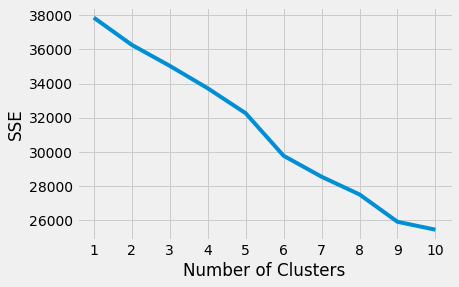

In [132]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 1,
  "max_iter": 1000,
  "random_state": 42,
}

sse=[]
for k in range(1, 11):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(d_normalizado)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [133]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

In [134]:
silhouette_coefficients = []
#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(d_normalizado)
  score = silhouette_score(d_normalizado, kmeans.labels_)
  silhouette_coefficients.append(score)

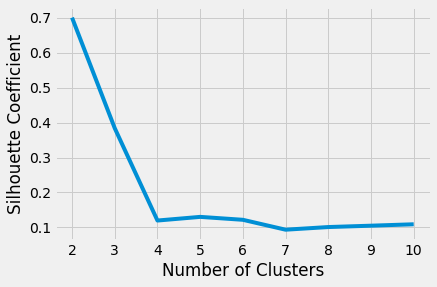

In [135]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()